In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler, Binarizer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix, mean_squared_error, accuracy_score, recall_score, precision_score, precision_recall_curve, roc_curve
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Background: Women of Pima Indian heritage have a higher risk of developing diabetes in the next five years. 

Background Data: Data Source - Kaggle Datasets -  Dataset taken from the National Institute of Diabetes and Digestive and Kidney Diseases. Several constraints were placed on the selection of these instances. Patients in this data are all females aged 21 years and above and come from the Pima Indians heritage.

Objective: To identify Pima Indian women who are at a high risk of developing diabetes mellitus within the next five years.

### Data Understanding

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0, 0.5, 'Number of data rows')

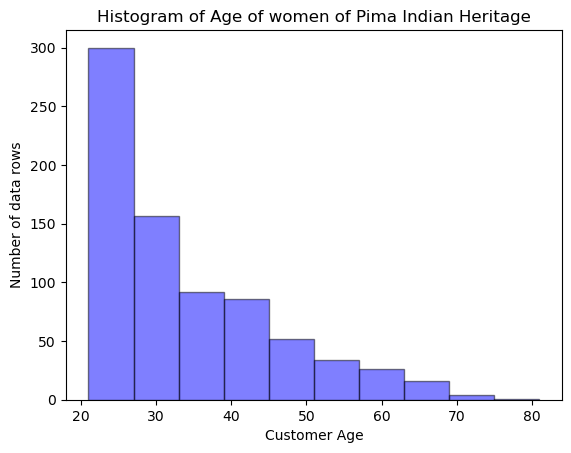

In [10]:
plt.hist(x=df['Age'], bins=10, edgecolor = 'black', alpha=0.5, color='blue')
plt.title("Histogram of Age of women of Pima Indian Heritage")
plt.xlabel("Customer Age")
plt.ylabel("Number of data rows")

Text(0, 0.5, 'Number of data rows')

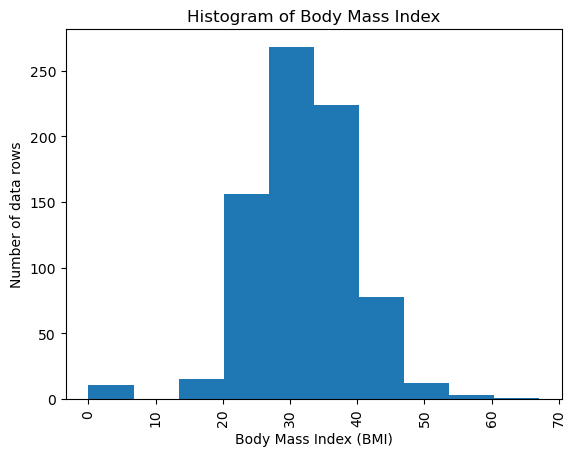

In [8]:
plt.hist(x=df['BMI'])
plt.xticks(rotation='vertical')
plt.title("Histogram of Body Mass Index")
plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Number of data rows")

In [9]:
df.groupby('BMI')['Outcome'].value_counts()

BMI   Outcome
0.0   0          9
      1          2
18.2  0          3
18.4  0          1
19.1  0          1
                ..
53.2  1          1
55.0  1          1
57.3  0          1
59.4  1          1
67.1  1          1
Name: Outcome, Length: 358, dtype: int64

BMI can't be zero. Data imputation - perhaps use mean of BMI

Pregnancies  Outcome
0            0           73
1            0          106
2            0           84
3            0           48
4            0           45
5            0           36
6            0           34
7            0           20
8            0           16
9            0           10
10           0           14
11           0            4
12           0            5
13           0            5
Name: Outcome, dtype: int64
Pregnancies  Outcome
0            1          38
1            1          29
2            1          19
3            1          27
4            1          23
5            1          21
6            1          16
7            1          25
8            1          22
9            1          18
10           1          10
11           1           7
12           1           4
13           1           5
14           1           2
15           1           1
17           1           1
Name: Outcome, dtype: int64


<AxesSubplot:xlabel='Pregnancies', ylabel='Age'>

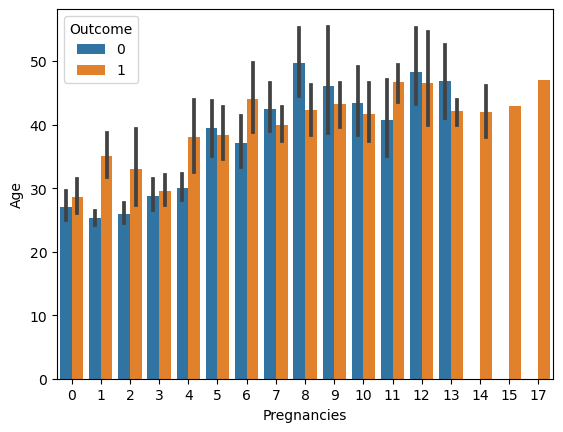

In [17]:
print(df[df.Outcome == 0].groupby(['Pregnancies'])['Outcome'].value_counts())
print(df[df.Outcome == 1].groupby(['Pregnancies'])['Outcome'].value_counts())
categs = [key for key, _ in df.groupby(['Pregnancies'])]
sns.barplot(data=df, x="Pregnancies", y= "Age", hue="Outcome")

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

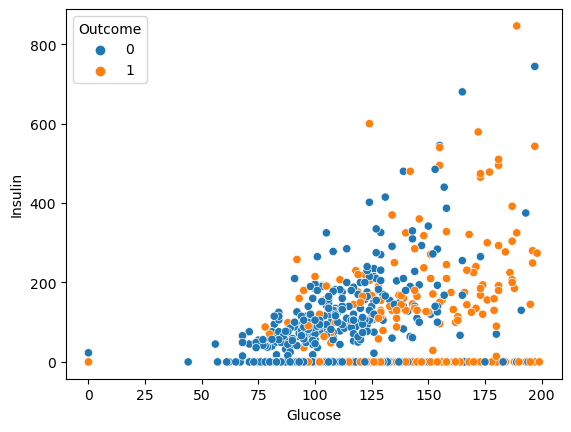

In [19]:
sns.scatterplot(data=df, x="Glucose", y= "Insulin", hue="Outcome")

In [11]:
df.groupby('housing')['y'].value_counts()

housing  y  
no       no     16596
         yes     2026
unknown  no       883
         yes      107
yes      no     19069
         yes     2507
Name: y, dtype: int64

In [20]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [35]:
# transformer for all models except SVC
transformer = make_column_transformer((PolynomialFeatures(degree = 2), X.columns.tolist()), remainder = StandardScaler())

#transformer for SVC
# svc_transformer = make_column_transformer((StandardScaler()))
                                  

### Data Preparation

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [38]:
lgr_pipe = Pipeline([('transformer', transformer),
                               ('lgr', LogisticRegression(random_state=42, max_iter = 1000))])
lgr_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('polynomialfeatures',
                                                  PolynomialFeatures(),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('lgr', LogisticRegression(max_iter=1000, random_state=42))])

[('Pregnancies', 0.009374999999999977), ('Glucose', 0.14791666666666664), ('BloodPressure', 0.013194444444444398), ('SkinThickness', 0.011111111111111094), ('Insulin', 0.02222222222222219), ('BMI', 0.03819444444444442), ('DiabetesPedigreeFunction', 0.0065972222222221875), ('Age', 0.05659722222222217)]


<AxesSubplot:>

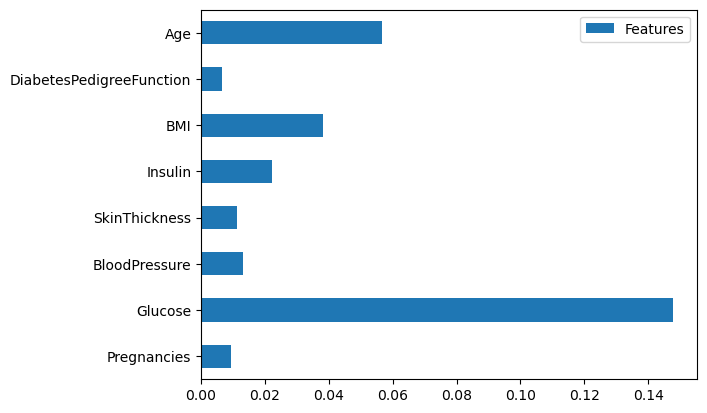

In [39]:
imp = permutation_importance(lgr_pipe, X_train, y_train)
imp_cols = zip(X_train.columns,imp.importances_mean)
#print(imp.importances_mean)
model_1_df = pd.DataFrame(imp.importances_mean, columns=['Features'],index=X_train.columns)
print(list(imp_cols))
model_1_df.plot.barh()

                                                        Features
polynomialfeatures__1                              -7.198690e-04
polynomialfeatures__Pregnancies                    -8.630608e-04
polynomialfeatures__Glucose                        -4.304616e-02
polynomialfeatures__BloodPressure                  -2.406335e-02
polynomialfeatures__SkinThickness                  -7.462639e-03
polynomialfeatures__Insulin                        -2.627274e-02
polynomialfeatures__BMI                            -1.126866e-02
polynomialfeatures__DiabetesPedigreeFunction       -1.056559e-04
polynomialfeatures__Age                            -1.094786e-02
polynomialfeatures__Pregnancies^2                   3.458259e-03
polynomialfeatures__Pregnancies Glucose            -7.125291e-04
polynomialfeatures__Pregnancies BloodPressure      -2.630610e-03
polynomialfeatures__Pregnancies SkinThickness       8.658713e-03
polynomialfeatures__Pregnancies Insulin            -9.584905e-04
polynomialfeatures__Pregn

<AxesSubplot:>

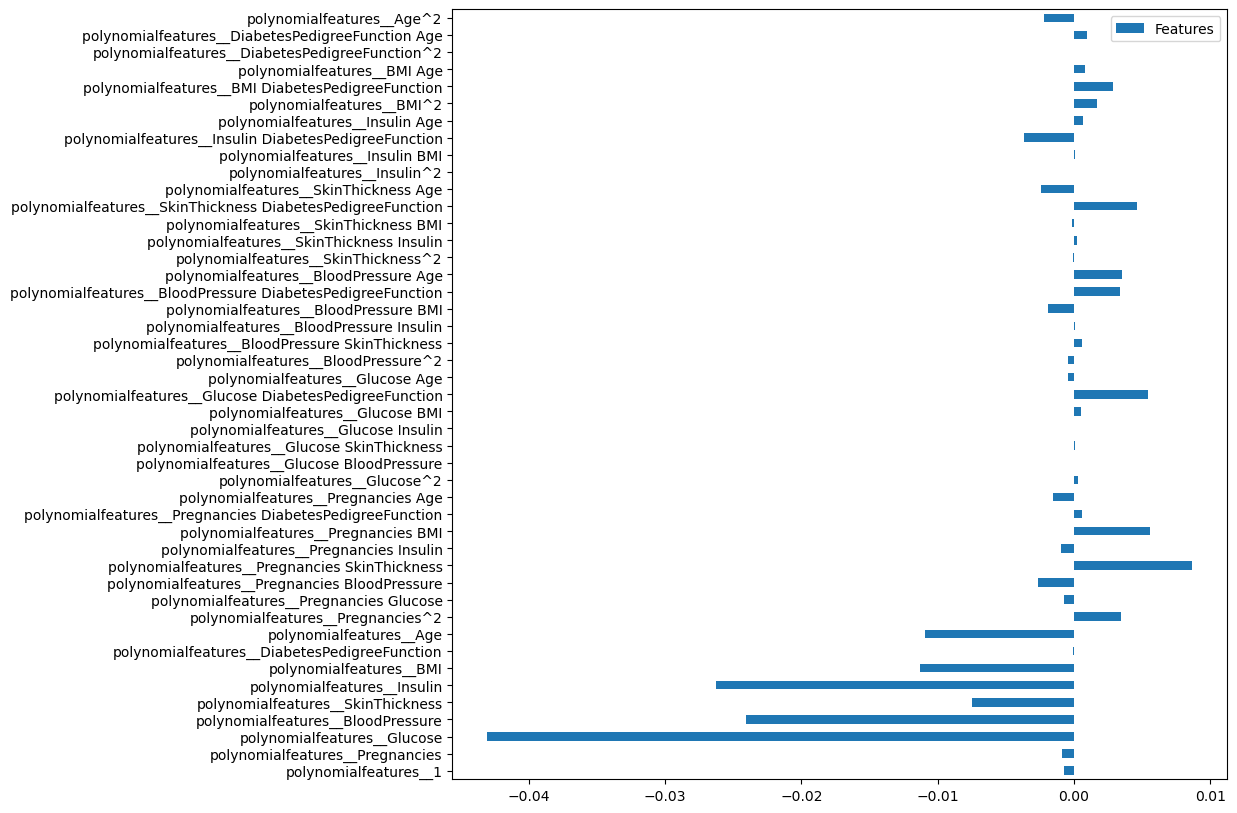

In [40]:
coef_df = pd.DataFrame(lgr_pipe[-1].coef_[0], columns=['Features'], index=lgr_pipe[0].get_feature_names_out())
print(coef_df)
coef_df.plot.barh(figsize=(10,10))

Glucose and Blood pressure and levels of insulin (2-hour serum insulin) are negatively correlated and therefore higher the numbers on these measurements the higher the risk of developing diabetes.

In [41]:
from sklearn.dummy import DummyClassifier

In [42]:
%%time
dummy_clf = DummyClassifier(random_state=42, strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
print(dummy_clf.score(X_train, y_train))
print(dummy_clf.score(X_test, y_test))


0.6545138888888888
0.640625
CPU times: user 2.64 ms, sys: 2.48 ms, total: 5.12 ms
Wall time: 5.6 ms


In [43]:

lgr_pipe = Pipeline([('transformer', transformer),
                               ('lgr', LogisticRegression(random_state=42, max_iter = 100000))])
lgr_pipe.fit(X_train, y_train)


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('polynomialfeatures',
                                                  PolynomialFeatures(),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('lgr', LogisticRegression(max_iter=100000, random_state=42))])

### Modeling and Scores


In [44]:
%%time

print(lgr_pipe.score(X_train, y_train))
print(lgr_pipe.score(X_test, y_test))

0.8055555555555556
0.734375
CPU times: user 7.28 ms, sys: 1.82 ms, total: 9.09 ms
Wall time: 7.76 ms


In [45]:
%%time
knn_pipe = Pipeline([('transformer', transformer), ('knn', KNeighborsClassifier())])
knn_pipe.fit(X_train, y_train)
print(knn_pipe.score(X_train, y_train))
print(knn_pipe.score(X_test, y_test))

0.8055555555555556
0.6614583333333334
CPU times: user 299 ms, sys: 17.4 ms, total: 316 ms
Wall time: 59.2 ms


In [46]:
%%time
tree_pipe = Pipeline([('transformer', transformer), ('dtree', DecisionTreeClassifier(random_state=42))]).fit(X_train, y_train)
tree_pipe.score(X_train, y_train)
print(tree_pipe.score(X_train, y_train))
print(tree_pipe.score(X_test, y_test))

1.0
0.71875
CPU times: user 21.5 ms, sys: 3.21 ms, total: 24.7 ms
Wall time: 27.4 ms


In [47]:
%%time
svc_pipe = Pipeline([('transformer', transformer), ('svc', SVC(random_state=42))]).fit(X_train, y_train)
print(svc_pipe.score(X_train, y_train))
print(svc_pipe.score(X_test, y_test))

0.7690972222222222
0.734375
CPU times: user 74.2 ms, sys: 3.62 ms, total: 77.8 ms
Wall time: 80.3 ms


In [48]:
res_dict = {'Model': ['Baseline','Logistic Regression', 'KNN', 'Decision Tree', 'SVC'],
           'Train Time': ['5.6 ms', '7.76 ms','59.2 ms', ' 27.4 ms', '80.3 ms'],
           'Train Accuracy': [0.6545138888888888, 0.8055555555555556, 0.8055555555555556, 1.0,0.7690972222222222],
           'Test Accuracy': [0.640625, 0.734375, 0.6614583333333334, 0.71875, 0.734375]}
results_df = pd.DataFrame(res_dict).set_index('Model')
results_df


,Train Time,Train Accuracy,Test Accuracy
Model,,,
Baseline,5.6 ms,0.654514,0.640625
Logistic Regression,7.76 ms,0.805556,0.734375
KNN,59.2 ms,0.805556,0.661458
Decision Tree,27.4 ms,1.000000,0.718750
SVC,80.3 ms,0.769097,0.734375


In [49]:
%%time
params = {'knn__n_neighbors': [1,3,9,12,15,18,21]}
grid_pipe = GridSearchCV(knn_pipe, param_grid=params).fit(X_train, y_train)
print(grid_pipe.score(X_train, y_train))
print(grid_pipe.score(X_test, y_test))

0.7899305555555556
0.6822916666666666
CPU times: user 2.95 s, sys: 50.1 ms, total: 3 s
Wall time: 393 ms


In [50]:
print(grid_pipe.best_params_)

{'knn__n_neighbors': 9}


In [51]:
test_predictions = grid_pipe.predict_proba(X_test)
asset_preds = grid_pipe.predict(X_test)

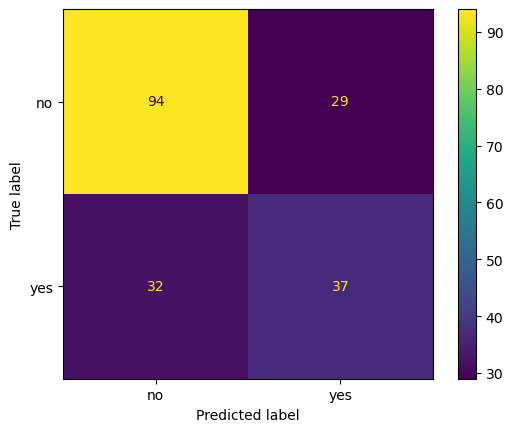

In [52]:
asset_confusion_mat = confusion_matrix(y_test, asset_preds, labels = grid_pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=asset_confusion_mat, display_labels =  [ 'no', 'yes'])
disp.plot()
plt.show()

In [53]:
params = {'dtree__max_depth': np.arange(1,20)}
dtree_grid_pipe = GridSearchCV(tree_pipe, param_grid=params).fit(X_train, y_train)
print(dtree_grid_pipe.score(X_train, y_train))
print(dtree_grid_pipe.score(X_test, y_test))
print(dtree_grid_pipe.best_params_)

0.8177083333333334
0.7760416666666666
{'dtree__max_depth': 4}


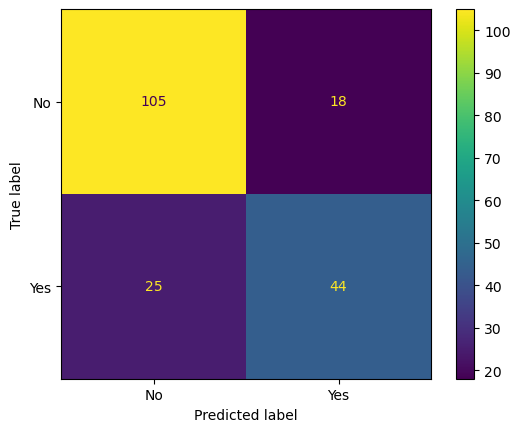

In [54]:
dtree_asset_preds = dtree_grid_pipe.predict(X_test)
dtree_asset_confusion_mat = confusion_matrix(y_test, dtree_asset_preds, labels = grid_pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=dtree_asset_confusion_mat, display_labels =  [ 'No', 'Yes'])
disp.plot()
plt.show()

In [ ]:
res_dict_2 = {'Model': ['Baseline','Logistic Regression', 'KNN', 'Decision Tree', 'SVC', 'GRIDCV KNN', 'GRIDCV D-Tree'],
           'Train Time': ['154 ms','433 ms', '1min 13s', '1.01 s','1min 16s', '28.5 s'],
           'Train Accuracy': [0.8869249943349196, 0.8868926224466673, 0.8883817293062705, 0.9171927098507656,0.8875400602117122],
           'Test Accuracy': [0.8886083325240361, 0.8896766048363601, 0.8757890647761484, 0.8666601922890163, 0.8879285228707391]}
results_df_2 = pd.DataFrame(res_dict).set_index('Model')
results_df_2

#### Results & Metrics change - Precision and Threshold

In [68]:
def precision_thresh(predict_probs, 
                  y_test, 
                  thresh):
    preds = np.where(predict_probs >= thresh, 1, 0)
    
    return precision_score(y_test, preds, pos_label=1)

In [69]:
def recall_thresh(predict_probs, 
                  y_test, 
                  thresh):
    preds = np.where(predict_probs >= thresh, 1, 0)
    
    return recall_score(y_test, preds, pos_label=1)

In [70]:
thresholds = np.arange(0, 1, .1)

In [74]:

test_predictions = dtree_grid_pipe.predict_proba(X_test)
asset_preds = dtree_grid_pipe.predict(X_test)
#print(test_predictions[:, 1])
print(dtree_grid_pipe.classes_)
print(accuracy_score(y_test, asset_preds))


[0 1]
0.7760416666666666


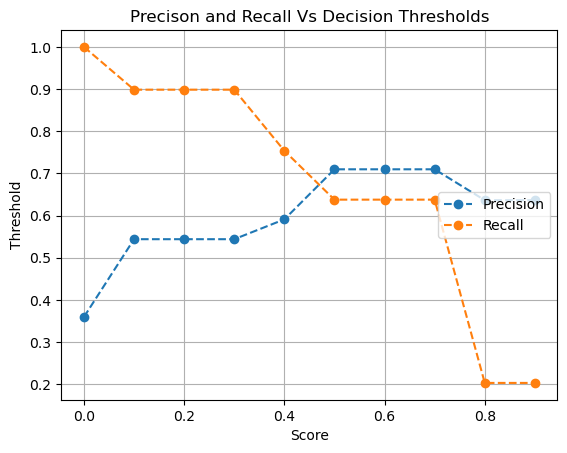

In [75]:
results_df = pd.DataFrame({'threshold': thresholds, 'precision': [precision_thresh(test_predictions[:, 1], y_test, i) for i in thresholds]})
results_df['recall'] = [recall_thresh(test_predictions[:, 1], y_test, i) for i in thresholds]
plt.plot(results_df['threshold'], results_df['precision'],'--o',label='Precision')
plt.plot(results_df['threshold'], results_df['recall'], '--o',label='Recall')
plt.grid()
plt.ylabel('Threshold')
plt.xlabel('Score')
plt.title('Precison and Recall Vs Decision Thresholds')
plt.legend(loc='center right')

False Positive Rates:  [0.         0.01626016 0.06504065 0.06504065 0.09756098]
True Positive Rates:  [0.         0.02898551 0.20289855 0.2173913  0.52173913]


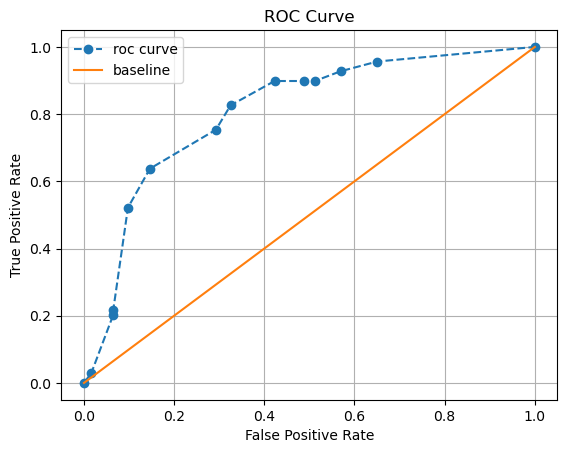

In [76]:
fpr, tpr, thresh_rocs = roc_curve(y_test, test_predictions[:,1], pos_label=1)
print('False Positive Rates: ', fpr[:5])
print('True Positive Rates: ', tpr[:5])
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid();

In [77]:
precision_score(y_test, asset_preds, pos_label=1)

0.7096774193548387

In [100]:
thresh_preds = np.where(test_predictions[:,1] >= 0.7, 1, 0)

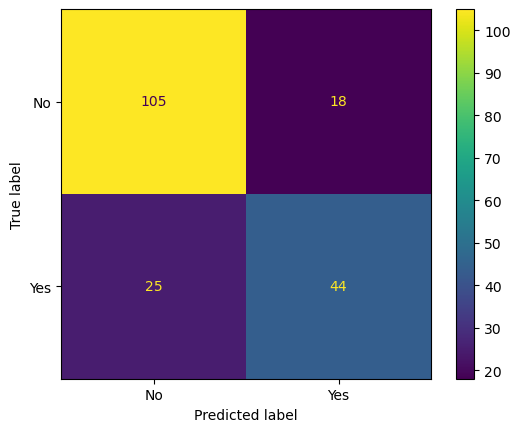

In [101]:
asset_confusion_mat = confusion_matrix(y_test, thresh_preds, labels = grid_pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=asset_confusion_mat, display_labels =  [ 'No', 'Yes'])
disp.plot()
plt.show()

Test accuracy is highest with Logistic Regression and SVM and slightly higher than a baseline classifier. A GridSearchCV process was used to identify optimal hyperparameters. For KNN an optimal n_neighbors of 9 and for decision trees a maximum depth of 4 was optimal. The accuracy with these parameter was slightly better from the baseline model.

The data consists of unknown category for most of the categorical columns and removing the unknowns might help with a better prediction. 

Decison Tree model performed better with test scores. Any probability threshold between 0.5 and 0.7 gave the same results and performed better than any other model tried before.



Client Report:
The model developed is a decision tree algorithm-based model that can be used to identify patients that will develop diabetes in the next 5 years. This model may identify patients that may not develop diabetes as potentially at risk for diabetes (false positives) and subject patients to unnecessary anxiety, tests and treatment. On the other hand, there is a certain number of patients that would not be diagnosed (false negatives) and this would delay the treatment which may not be an improvement from the current situation for these women.

As we collect more data with this model, there is a good chance that the model will improve. As the data continues increase, we would run the various classifiers again to pick the best model.

##### Questions